<a href="https://colab.research.google.com/github/NatShed/Regression/blob/main/%D0%A9%D0%B5%D0%B4%D1%80%D0%B8%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes  # подключаем датасет из sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

Загрузка данных

**Датасет:** https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

In [2]:
dataset = pd.read_csv("hour.csv")

Анализ данных

In [3]:
# размер датасета, 17379 записей, 17 столбцов
dataset.shape

(17379, 17)

In [4]:
# отображаем первые 10 сстрок датасета

dataset.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [5]:
# Метод Pandas info()  выводит очень много информации о наборе данных - количество записей,
# количество ненулевых значений в каждом столбце, тип данных в столбце

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
#количество пустых значений
dataset.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [7]:
# Разделение набора на обучающий и тестовый
X = dataset.drop('instant', axis=1)
X = X.drop( 'casual', axis=1)
X = X.drop('registered', axis=1)
X = X.drop('cnt', axis=1)
y = dataset['cnt']

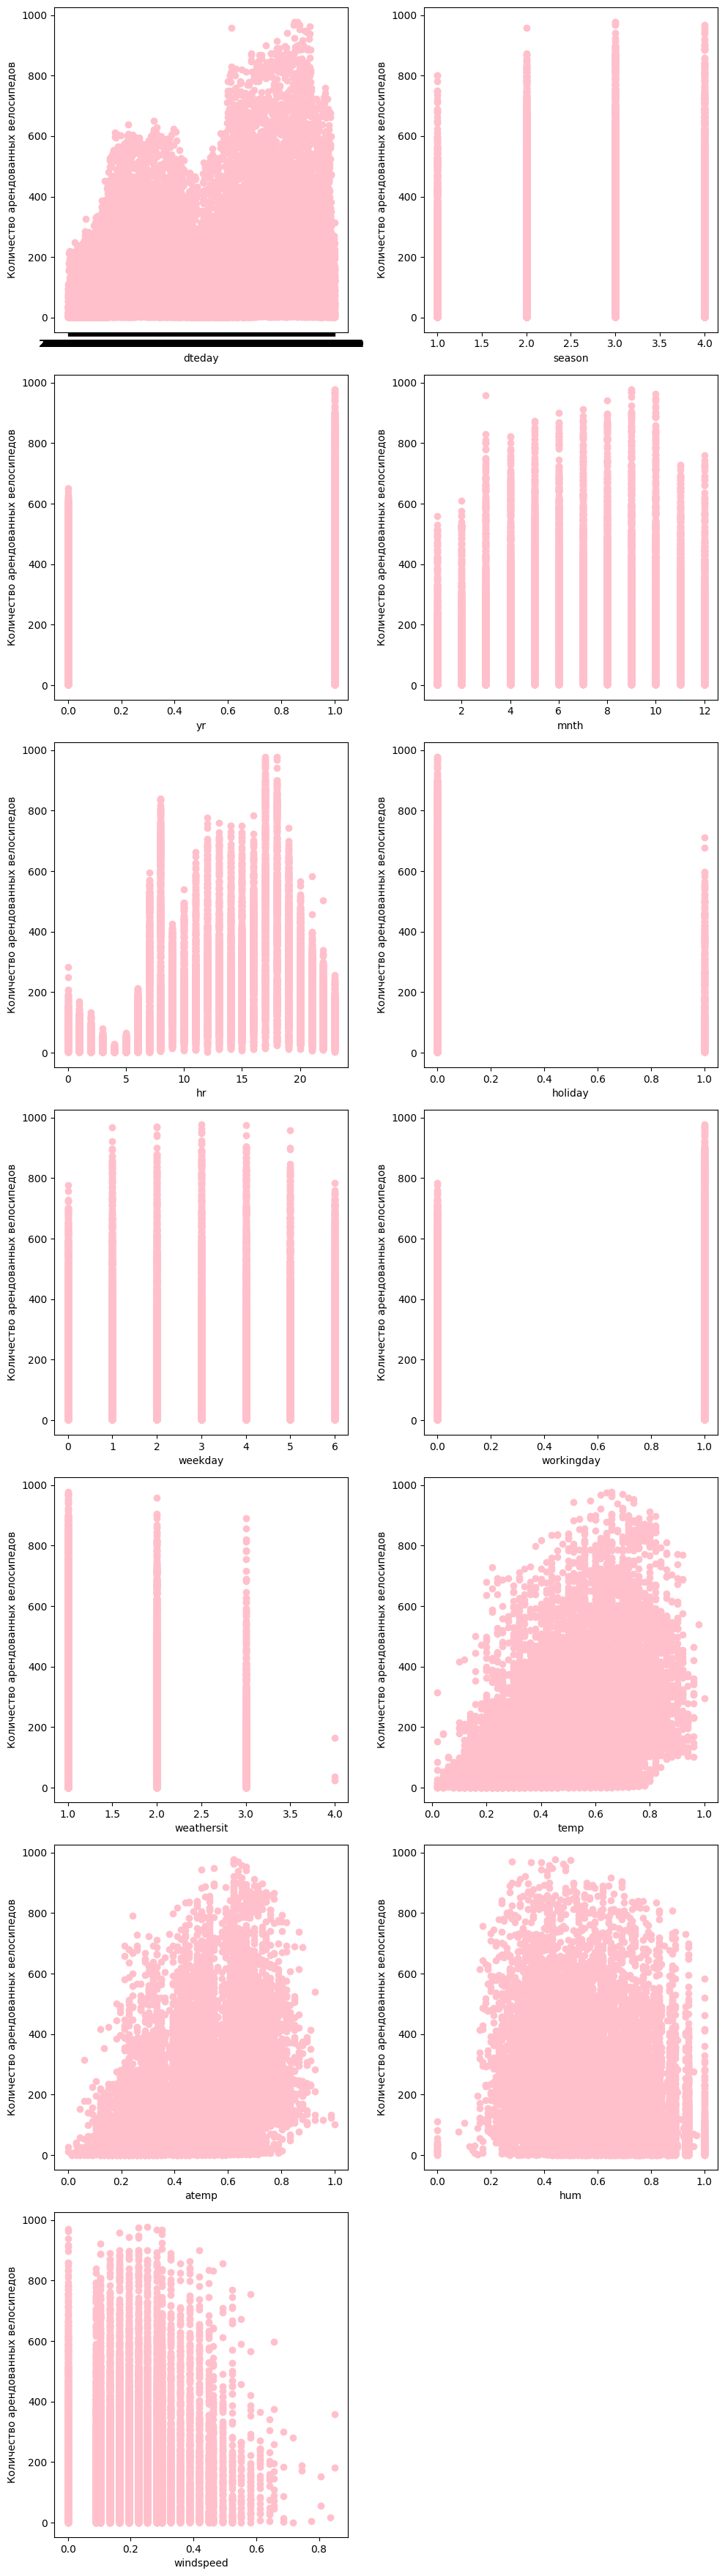

In [8]:
num_rows = (len(X.columns) + 2 - 1)  # вычисляем количество строк
fig, axs = plt.subplots(num_rows, 2, figsize=(10, 5 * num_rows))

for i, column in enumerate(X.columns):
    ax = axs[i // 2, i % 2]
    ax.scatter(X[column], y, color='pink')
    ax.set_ylabel('Количество арендованных велосипедов')
    ax.set_xlabel(column)

#убираем пустые графики
for j in range(i + 1, num_rows * 2):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout() #чтобы графики не пересекались

In [9]:
X = X.drop('dteday', axis=1)

In [10]:
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (17379, 12) | y shape: (17379,) 


In [11]:
#готовим датасет для обучения
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
# сразу напишем код функции, которая будет вычислять все нужные метрики

def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

#MSE - среднеквадратичная ошибка (RMSE - корень из неё) - отклонение остатков
#R2 - коэффициент детерминации
#Adj R - скорректированный р2

**Линейная регрессия**

In [13]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
modelLR = LinearRegression()

# Fit the model to the data
modelLR.fit(X_train, y_train)

# Predict the response for a new data point
y_pr_LR = modelLR.predict(X_test)

In [14]:
_ = Reg_Models_Evaluation_Metrics(modelLR, X_train, y_train, X_test, y_test, y_pr_LR)

RMSE:  139.2115
  R2: 0.388
 Adjusted R2: 0.3859
 Cross Validated R2: 0.3875


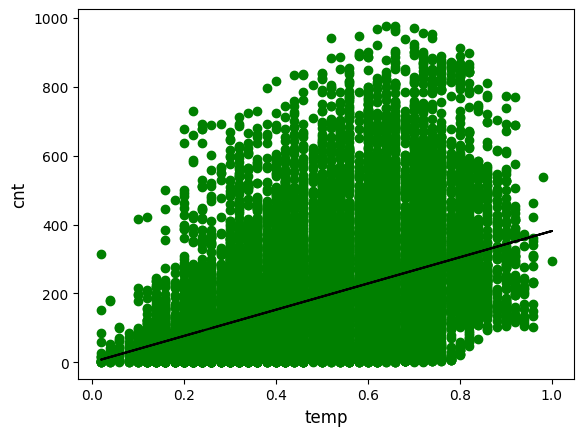

In [35]:
# попробуем отрисовать, как выглядит наша линейная регрессия

X2 = dataset['temp'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dataset['cnt'].values

model2 = LinearRegression()
model2.fit(X2, y2)

plt.scatter(X2, y2,color='g')
plt.plot(X2, model2.predict(X2),color='k')
plt.ylabel('cnt', size=12)
plt.xlabel('temp', size=12)
plt.show()



***Полиномиальная регрессия***

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)

poly_features = poly.fit_transform(X)
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [18]:
modelPR = LinearRegression()

modelPR.fit(X_p_train, y_p_train)

y_pr_PR = modelPR.predict(X_p_test)

_ = Reg_Models_Evaluation_Metrics(modelPR, X_p_train, y_p_train, X_p_test, y_p_test, y_pr_PR)

RMSE:  108.9289
  R2: 0.6244
 Adjusted R2: 0.5886
 Cross Validated R2: 0.6263


Text(0.5, 0, 'temp')

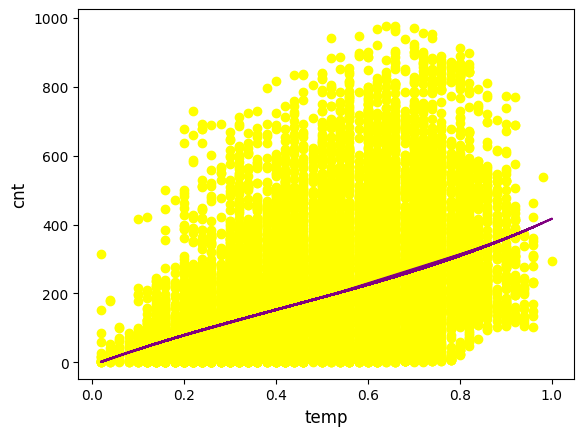

In [19]:
X2 = dataset['temp'].values[:,np.newaxis]
# target data is array of shape (n,)
y2 = dataset['cnt'].values


poly_features = poly.fit_transform(X2)

model2 = LinearRegression()
model2.fit(poly_features, y2)

plt.scatter(X2, y2,color='yellow')
plt.plot(X2, model2.predict(poly.fit_transform(X2)),color='purple')
plt.ylabel('cnt', size=12)
plt.xlabel('temp', size=12)

**Регрессия дерева принятия решений**

In [20]:
from sklearn.tree import DecisionTreeRegressor

modelDT = DecisionTreeRegressor()
modelDT.fit(X_train, y_train)
y_dt_pred = modelDT.predict(X_test)

In [ ]:
_ = Reg_Models_Evaluation_Metrics(modelDT, X_train, y_train, X_test, y_test, y_dt_pred)

RMSE:  58.9066
  R2: 0.8904
 Adjusted R2: 0.89
 Cross Validated R2: 0.8893


**Регрессия случайного леса**

In [23]:
from sklearn.ensemble import RandomForestRegressor

modelRF = RandomForestRegressor(n_estimators=100)
modelRF.fit(X_train, y_train)
y_rf_pred = modelRF.predict(X_test)

In [24]:
_ = Reg_Models_Evaluation_Metrics(modelRF, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  42.1288
  R2: 0.944
 Adjusted R2: 0.9438
 Cross Validated R2: 0.9425


**регрессия опорных векторов**

In [25]:
from sklearn.svm import SVR

modelSVR = SVR(kernel='linear')
modelSVR.fit(X_train, y_train)
y_rf_pred = modelSVR.predict(X_test)

In [26]:
_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  144.7556
  R2: 0.3383
 Adjusted R2: 0.336
 Cross Validated R2: 0.3275


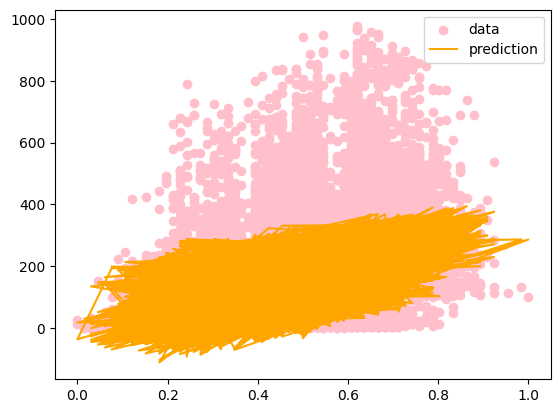

In [27]:
plt.scatter(X_train['atemp'], y_train, color='pink', label='data')
plt.plot(X_train['atemp'], modelSVR.predict(X_train), color='orange', label='prediction')
plt.legend()

In [28]:
from sklearn.svm import SVR

#Полиномиальное ядро
modelSVR = SVR(kernel='poly')
modelSVR.fit(X_train, y_train)
y_rf_pred = modelSVR.predict(X_test)

In [29]:
_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  157.6836
  R2: 0.2148
 Adjusted R2: 0.2121
 Cross Validated R2: 0.2044


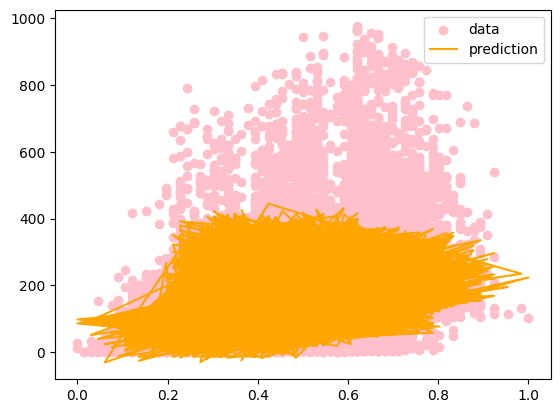

In [31]:
plt.scatter(X_train['atemp'], y_train, color='pink', label='data')
plt.plot(X_train['atemp'], modelSVR.predict(X_train), color='orange', label='prediction')
plt.legend()

In [32]:
# Ядро - радиальная базисная функция
modelSVR = SVR(kernel='rbf')
modelSVR.fit(X_train, y_train)
y_rf_pred = modelSVR.predict(X_test)

In [33]:
_ = Reg_Models_Evaluation_Metrics(modelSVR, X_train, y_train, X_test, y_test, y_rf_pred)

RMSE:  140.309
  R2: 0.3783
 Adjusted R2: 0.3761
 Cross Validated R2: 0.3596


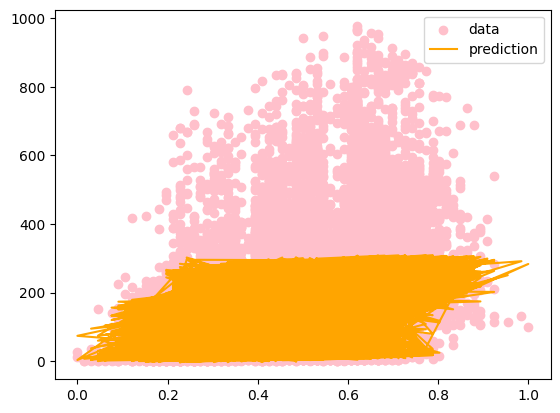

In [34]:
plt.scatter(X_train['atemp'], y_train, color='pink', label='data')
plt.plot(X_train['atemp'], modelSVR.predict(X_train), color='orange', label='prediction')
plt.legend()

**Регрессия ElasticNet**

In [36]:
from sklearn.linear_model import ElasticNet

modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)
modelEN.fit(X_train, y_train)
y_en_pred = modelEN.predict(X_test)


In [37]:
_ = Reg_Models_Evaluation_Metrics(modelEN, X_train, y_train, X_test, y_test, y_en_pred)

RMSE:  140.7637
  R2: 0.3743
 Adjusted R2: 0.3721
 Cross Validated R2: 0.3763


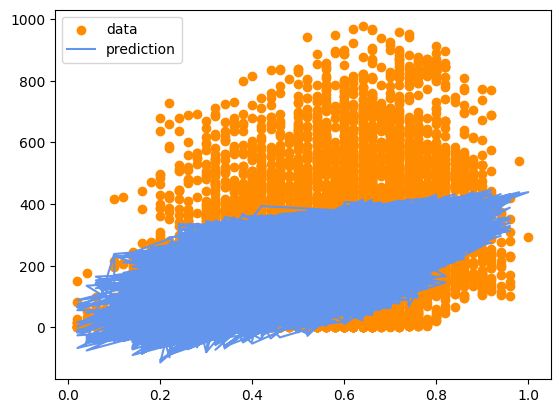

In [40]:
plt.scatter(X_train['temp'], y_train, color='darkorange',label='data')
plt.plot(X_train['temp'], modelEN.predict(X_train), color='cornflowerblue',label='prediction')
plt.legend()
plt.show()